In [1]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import matplotlib.pyplot as plt
import traceback
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm
from select_sensor import SelectSensor
from sensor import Sensor
from joblib import Memory, Parallel, delayed

In [53]:
start = time.time()

selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

subset_list = selectsensor.select_offline_greedy(5)
print('The selected subset is: ', subset_list)

print('time elapsed:', time.time()-start)

Computed covariance!
[0] 0.0166434544566
[1] 0.0129393306223
[2] 0.0165262357847
[3] 0.0141985524828
[4] 0.0108603993687
[5] 0.0111011826022
[6] 0.0102953855245
[7] 0.0147877462679
[8] 0.0167445501893
[9] 0.0155235920825
[10] 0.012660428033
[11] 0.0121858146591
[12] 0.0102195031677
[13] 0.00978124151763
[14] 0.0237937312591
[15] 0.013729890385
[16] 0.0158147795756
[17] 0.01165224123
[18] 0.0198806698734
[19] 0.0101222680479
[0, 14] 0.135293070248
[1, 14] 0.243360825596
[2, 14] 0.197714035746
[3, 14] 0.155870182349
[4, 14] 0.177980837284
[5, 14] 0.321260296624
[6, 14] 0.281379432808
[7, 14] 0.157376392437
[8, 14] 0.243329916834
[9, 14] 0.273156922763
[10, 14] 0.256020635737
[11, 14] 0.302540686694
[12, 14] 0.257390958426
[13, 14] 0.127444404573
[14, 15] 0.104903226602
[14, 16] 0.184608437475
[14, 17] 0.173271874648
[14, 18] 0.25062809301
[14, 19] 0.258306791083
[0, 5, 14] 0.440125699419
[1, 5, 14] 0.769800228593
[2, 5, 14] 0.703490683749
[3, 5, 14] 0.632895142518
[4, 5, 14] 0.7428423972

In [2]:
start = time.time()

selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

subset_list = selectsensor.select_offline_greedy(5)
print('The selected subset is: ', subset_list)

print('time elapsed:', time.time()-start)

Computed covariance!
[0] 0.0166434544566
[1] 0.0129393306223
[2] 0.0165262357847
[3] 0.0141985524828
[4] 0.0108603993687
[5] 0.0111011826022
[6] 0.0102953855245
[7] 0.0147877462679
[8] 0.0167445501893
[9] 0.0155235920825
[10] 0.012660428033
[11] 0.0121858146591
[12] 0.0102195031677
[13] 0.00978124151763
[14] 0.0237937312591
[15] 0.013729890385
[16] 0.0158147795756
[17] 0.01165224123
[18] 0.0198806698734
[19] 0.0101222680479
[0, 14] 0.135293070248
[1, 14] 0.243360825596
[2, 14] 0.197714035746
[3, 14] 0.155870182349
[4, 14] 0.177980837284
[5, 14] 0.321260296624
[6, 14] 0.281379432808
[7, 14] 0.157376392437
[8, 14] 0.243329916834
[9, 14] 0.273156922763
[10, 14] 0.256020635737
[11, 14] 0.302540686694
[12, 14] 0.257390958426
[13, 14] 0.127444404573
[14, 15] 0.104903226602
[14, 16] 0.184608437475
[14, 17] 0.173271874648
[14, 18] 0.25062809301
[14, 19] 0.258306791083
[0, 5, 14] 0.440125699419
[1, 5, 14] 0.769800228593
[2, 5, 14] 0.703490683749
[3, 5, 14] 0.632895142518
[4, 5, 14] 0.7428423972

In [9]:
#visualize the sensors and errors

sensors = {}
with open('data/sensor.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((15, 15))
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = 1

with open('data/higherror.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('(', '')
        line = line.replace(', ', ' ')
        line = line.replace(') ', '')
        line = line.strip()
        line = line.split(' ')
        x, y, e = int(line[0]), int(line[1]), float(line[2])
        if e > 0:
            if grid[x][y] > 0.99:
                grid[x][y] = 0.5
            else:
                grid[x][y] = -e/10

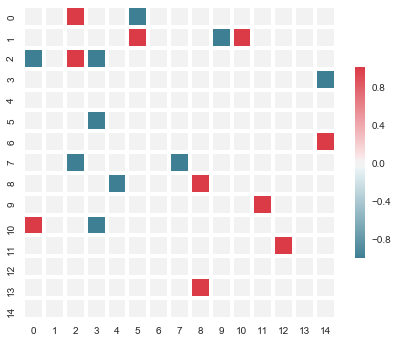

In [30]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=3, cbar_kws={"shrink": .5})

plt.show()

In [29]:
# visualize selected and not selected sensors

sensors = {}
with open('data/sensor.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((15, 15))
selected = [0, 3, 6, 8, 9, 12, 15, 17, 18, 19]
i, j = 0, 0
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    if i == selected[j]:
        grid[x][y] = 1
        j += 1
    else:
        grid[x][y] = -1
    i += 1

In [36]:
cachedir = 'your_cache_dir_goes_here'
mem = Memory(cachedir)

In [40]:
a = np.vander(np.arange(3)).astype(np.float)

In [41]:
square = mem.cache(np.square)

In [42]:
b = square(a)

________________________________________________________________________________
[Memory] Calling square...
square(array([[ 0.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 4.,  2.,  1.]]))
___________________________________________________________square - 0.0s, 0.0min


In [43]:
c = square(a)

In [8]:
Parallel(n_jobs=2)(delayed(math.sqrt)(i ** 2) for i in range(1000000))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [63]:
def convolve_random(size, i):
    print(i)
    return np.convolve(np.random.random_sample(size), np.random.random_sample(size))

In [103]:
def inner_loop(i, j):
    for k in range(i*j*j):
        pass
    return i, j

In [104]:
start = time.time()
for i in range(100):
    for j in range(100):
        inner_loop(i, j)
time.time() - start

31.842401027679443

In [105]:
def inner(i):
    for j in range(100):
        for k in range(i*j*j):
            pass

In [108]:
start = time.time()

Parallel(n_jobs=1)(delayed(inner)(i) for i in range(100))

time.time() - start

31.24658203125

In [97]:
a = [1 for i in range(2500)]

In [101]:
start = time.time()
product = 1
for i in a:
    product *= i
time.time() - start

0.0004987716674804688

In [102]:
def inner(product, i):
    return product*i

In [ ]:
Parallel(n_jobs=4)(delayed(inner)(hehe, i, j*100) for i in a)

In [70]:
array = Parallel(n_jobs=4)(delayed(convolve_random)(4000+j*1000, i) for j in range(8))

In [71]:
array

[array([ 0.49239791,  0.63150118,  0.92734058, ...,  0.74031424,
         0.19037499,  0.05787737]),
 array([ 0.05257659,  0.40942891,  0.56892582, ...,  1.52040895,
         0.24352328,  0.89298406]),
 array([ 0.47700046,  0.46867077,  0.50888052, ...,  0.39992488,
         0.72020677,  0.39007001]),
 array([ 0.04312057,  0.36335653,  0.68514088, ...,  0.26678919,
         0.19316823,  0.16260719]),
 array([ 0.03841276,  0.27467835,  0.79706282, ...,  1.08279108,
         0.57787019,  0.11943003]),
 array([ 0.19351439,  0.75074371,  1.05230625, ...,  1.1907181 ,
         1.2567072 ,  0.72417412]),
 array([ 0.18735397,  0.74639789,  0.88985403, ...,  0.68227579,
         0.74577927,  0.5343878 ]),
 array([ 0.06161659,  0.60024061,  0.88004996, ...,  0.92665318,
         0.37090917,  0.08734675])]

In [61]:
#%timeit [convolve_random(40000+i*1000) for i in range(8)]
for i in range(1):
    array = Parallel(n_jobs=4)(delayed(convolve_random)(4000+j*1000, i) for j in range(8))

In [62]:
array

[array([ 0.37325987,  0.83986001,  1.27718158, ...,  0.68892675,
         0.19119029,  0.02384285]),
 array([ 0.33988305,  0.23380774,  0.58687233, ...,  1.02260694,
         0.77415681,  0.27524187]),
 array([ 0.22709067,  0.56765589,  1.11792751, ...,  1.37659526,
         0.82336819,  0.45388934]),
 array([ 0.0822823 ,  0.21192355,  0.41150097, ...,  0.67451335,
         0.30309815,  0.46243795]),
 array([ 0.44150872,  0.57658381,  0.31160225, ...,  0.11335273,
         0.19560085,  0.13102007]),
 array([ 0.80476716,  1.08962803,  0.91150914, ...,  0.26392694,
         0.23881518,  0.0631544 ]),
 array([ 0.08146184,  0.34737116,  0.70285529, ...,  1.14512813,
         0.86881475,  0.34870947]),
 array([ 0.05120796,  0.19595479,  0.37460537, ...,  0.87388987,
         1.15499675,  0.56450037])]

In [25]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

Computed covariance!


In [26]:
%timeit selectsensor.o_t([1, 3])
%timeit selectsensor.o_t([1, 3, 5, 7, 9])

3.49 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.46 s ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit selectsensor.o_t([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
%timeit selectsensor.o_t([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

3.58 s ± 89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.7 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
